In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('./csgo_round_snapshots.csv')

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


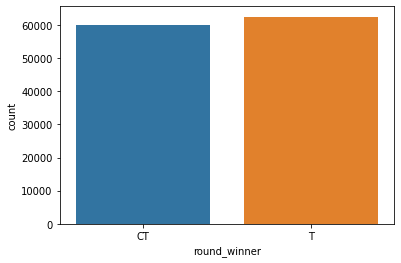

In [ ]:
#vendo que lado ganha mais que outro (lado CT ou TR)
sns.countplot(df['round_winner'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


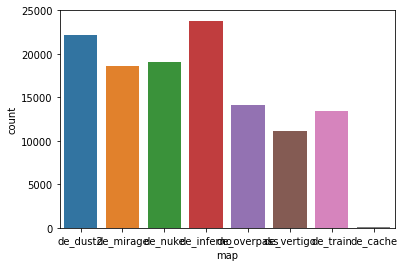

In [ ]:
#vendo quantidade de vitorias de cada mapa
sns.countplot(df['map'])

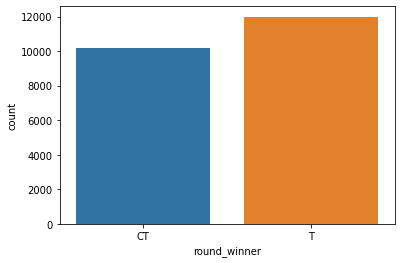

In [ ]:
mapas_mais_populares = ['de_dust2', 'de_mirage']

#verificando mapa de_dust2
d1 = df[df['map'] == mapas_mais_populares[0]]
sns.countplot(data = d1, x = 'round_winner')



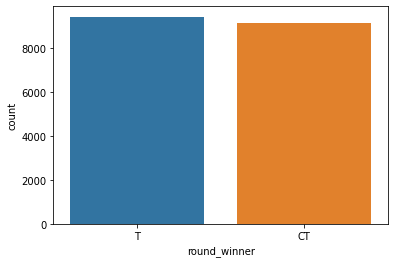

In [ ]:
#verificando mapa de_mirage
d2 = df[df['map'] == mapas_mais_populares[1]]
sns.countplot(data = d2, x = 'round_winner')

In [ ]:
encoder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
#descartando colunas de valor unico
for column in df.columns:
    if len(df[column].unique()) == 1:
        df = df.drop([column], axis = 1)

In [ ]:
#convertendo alguns atributos do dataset
df['round_winner'] = df['round_winner'].replace({'T' : 0, 'CT' : 1})
df['bomb_planted'] = df['bomb_planted'].astype(np.int16)
y = df['round_winner']

In [ ]:
#dividindo dados para treino e para teste

df = df.drop('round_winner', axis = 1)
df['map'] = encoder.fit_transform(df['map'])

X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle = True, train_size = 0.8, random_state = 24)

In [ ]:
#usando modelo arvore de decisão
Estimator = DecisionTreeClassifier()
param_grid = {'max_depth':[None,1,2,3], 'min_samples_leaf' :[2,3,4] }
Optimizer = GridSearchCV(Estimator, param_grid, cv = 5)

In [ ]:
Optimizer.fit(x_train, y_train)

predTrain = Optimizer.predict(x_train)
predTest = Optimizer.predict(x_test)

print(classification_report(y_train, predTrain))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     49908
           1       0.99      0.95      0.97     48020

    accuracy                           0.97     97928
   macro avg       0.97      0.97      0.97     97928
weighted avg       0.97      0.97      0.97     97928



In [ ]:
print(classification_report(y_test, predTest))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     12498
           1       0.84      0.79      0.81     11984

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [ ]:
#acuracia 
print(accuracy_score(y_test, predTest))

0.8212155869618495
